In [30]:
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords

In [31]:
df = pd.read_csv('apple_iphone_11_reviews.csv')

In [32]:
df

,index,product,helpful_count,total_comments,url,review_country,reviewed_at,review_text,review_rating,product_company,profile_name,review_title
0,0,Apple iPhone XR (64GB) - Black,"5,087 people found this helpful",24,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2018-12-12,NOTE:,3.0 out of 5 stars,Apple,Sameer Patil,"Which iPhone you should Purchase ? iPhone 8, X..."
1,1,Apple iPhone XR (64GB) - Black,"2,822 people found this helpful",6,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2018-11-17,Very bad experience with this iPhone xr phone....,1.0 out of 5 stars,Apple,Amazon Customer,Don't buy iPhone xr from Amazon.
2,2,Apple iPhone XR (64GB) - Black,"1,798 people found this helpful",0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-01-27,Amazing phone with amazing camera coming from ...,5.0 out of 5 stars,Apple,A,Happy with the purchase
3,3,Apple iPhone XR (64GB) - Black,"1,366 people found this helpful",14,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-05-02,So I got the iPhone XR just today. The product...,1.0 out of 5 stars,Apple,Shubham Dutta,Amazon is not an apple authorised reseller. Pl...
4,4,Apple iPhone XR (64GB) - Black,536 people found this helpful,5,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-05-24,I've been an android user all my life until I ...,5.0 out of 5 stars,Apple,Nepuni Lokho,Excellent Battery life and buttery smooth UI
...,...,...,...,...,...,...,...,...,...,...,...,...
5005,5005,Apple iPhone XR (64GB) - Black,0,0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-11-13,Dhamaka,4.0 out of 5 stars,Apple,Shreya,Dhamaka phone
5006,5006,Apple iPhone XR (64GB) - Black,0,0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-11-15,Goodbye,4.0 out of 5 stars,Apple,murali hv,Good
5007,5007,Apple iPhone XR (64GB) - Black,0,0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-12-29,Nothing,5.0 out of 5 stars,Apple,Manish,Fantabulous phone. Easy to use.
5008,5008,Apple iPhone XR (64GB) - Black,0,0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-11-10,Superbb,5.0 out of 5 stars,Apple,basil john p,Fantastic


Accuracy: 0.7365269461077845


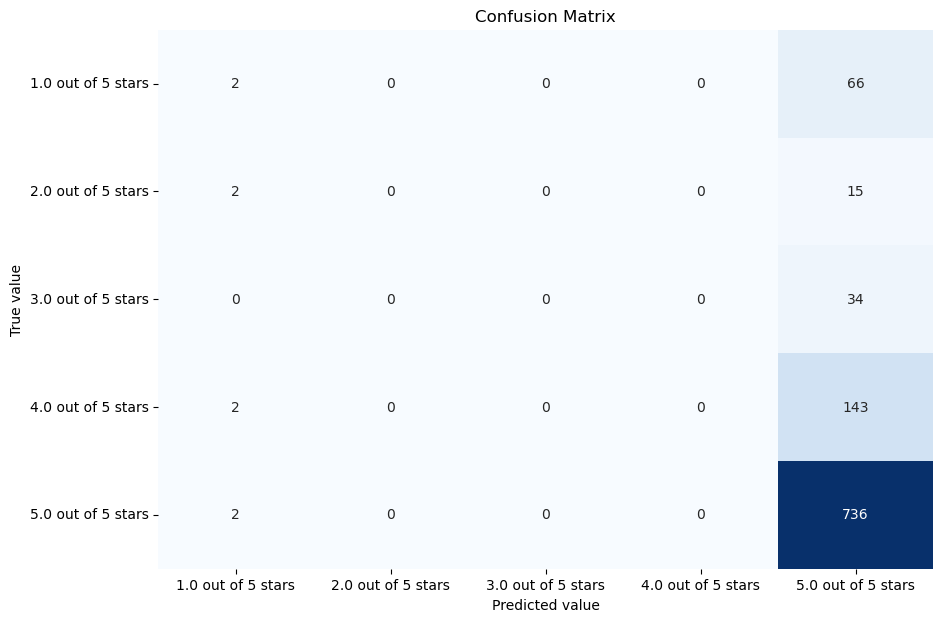

<Figure size 640x480 with 0 Axes>

In [33]:
#Creating naive bayes classifier model (no vectorization)
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

class NaiveBayesClassifier:
    def __init__(self, rating_scale):
        self.rating_scale = rating_scale
        self.class_word_counts = {rating: {} for rating in rating_scale}
        self.class_total_counts = {rating: 0 for rating in rating_scale}
        self.vocab = set()

    def preprocess_rating(self, raw_rating):
        return raw_rating

    def train(self, data):
        for row in data:
            text, raw_rating = str(row[0]), row[1]
            rating = self.preprocess_rating(raw_rating)
            if rating in self.rating_scale and isinstance(text, str):
                self.class_total_counts[rating] += 1
                for word in text.split():
                    if word not in self.class_word_counts[rating]:
                        self.class_word_counts[rating][word] = 1
                    else:
                        self.class_word_counts[rating][word] += 1
                    self.vocab.add(word)

    def predict(self, text):
        class_priors = {rating: count / sum(self.class_total_counts.values()) for rating, count in self.class_total_counts.items()}
        class_likelihoods = {rating: 0 for rating in self.rating_scale}

        for rating in self.rating_scale:
            for word in text.split():
                word_count = self.class_word_counts[rating].get(word, 0) + 1
                total_count = self.class_total_counts[rating] + len(self.vocab) + 1
                class_likelihoods[rating] += math.log(word_count / total_count)

        class_posteriors = {rating: math.exp(class_likelihoods[rating] + math.log(class_priors[rating])) for rating in self.rating_scale}
        predicted_rating = max(class_posteriors, key=class_posteriors.get)
        return predicted_rating

    def visualize_confusion_matrix(self, true_ratings, predictions):
        cm = confusion_matrix(true_ratings, predictions, labels=self.rating_scale)
        df_cm = pd.DataFrame(cm, index=self.rating_scale, columns=self.rating_scale)

        plt.figure(figsize=(10, 7))
        sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.xlabel('Predicted value')
        plt.ylabel('True value')
        plt.title('Confusion Matrix')
        plt.show()



scale = ['1.0 out of 5 stars', '2.0 out of 5 stars', '3.0 out of 5 stars', '4.0 out of 5 stars', '5.0 out of 5 stars']
nb_classifier = NaiveBayesClassifier(scale)

# Split the data into training and testing sets
train_data, test_data = train_test_split(df[['review_text', 'review_rating']].values, test_size=0.2, random_state=42)

# Train the classifier with the training dataset
nb_classifier.train(train_data)

# Make predictions on the testing dataset
test_texts = [text for text, rating in test_data]
predictions = [nb_classifier.predict(text) for text in test_texts]


# Evaluate the accuracy of the model
true_ratings = [rating for text, rating in test_data]
accuracy = accuracy_score(true_ratings, predictions)
print("Accuracy:", accuracy)

# Visualize confusion matrix
nb_classifier.visualize_confusion_matrix(true_ratings, predictions)

plt.savefig('confusion_matrix1.png')

In [34]:
#Dropping null values in review_text
df2 = df.dropna(subset=['review_text'])

Accuracy: 0.7345309381237525


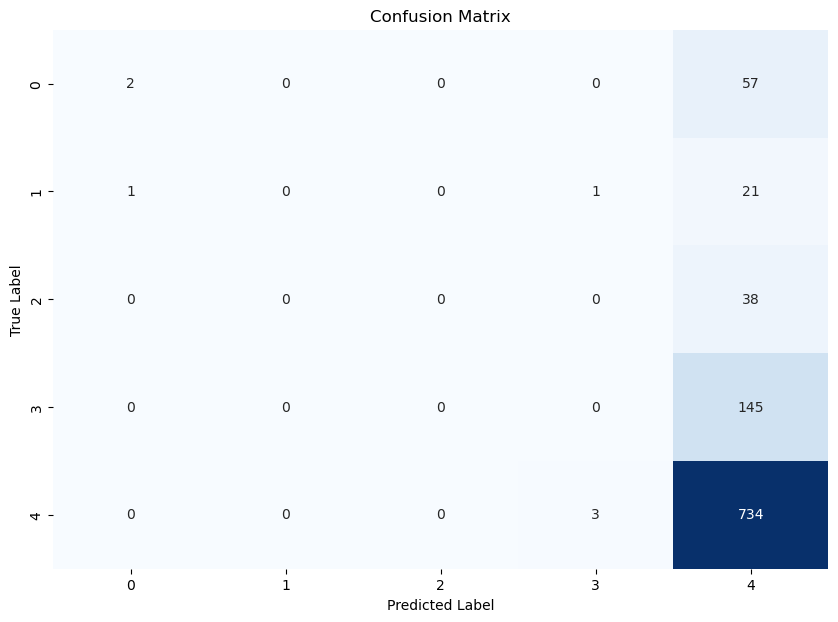

<Figure size 640x480 with 0 Axes>

In [35]:
#Vectorizing dataset using TF_IDF

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df2' is your dataset
# Split the data into training and testing sets
train_data, test_data = train_test_split(df2[['review_text', 'review_rating']], test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=4000, stop_words='english')
X_train = vectorizer.fit_transform(train_data['review_text'])
X_test = vectorizer.transform(test_data['review_text'])

# Convert ratings to numerical labels
y_train = train_data['review_rating'].astype('category').cat.codes
y_test = test_data['review_rating'].astype('category').cat.codes

# Train a Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the testing dataset
predictions = nb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Creating confusion matrix
cm = confusion_matrix(y_test, predictions)

# confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
plt.savefig('confusion_matrix2.png')


Accuracy: 0.76
                    precision    recall  f1-score   support

1.0 out of 5 stars       0.50      0.49      0.50        59
2.0 out of 5 stars       1.00      0.00      0.00        23
3.0 out of 5 stars       1.00      0.03      0.05        38
4.0 out of 5 stars       0.29      0.03      0.06       145
5.0 out of 5 stars       0.78      0.98      0.87       737

          accuracy                           0.76      1002
         macro avg       0.72      0.31      0.30      1002
      weighted avg       0.71      0.76      0.68      1002



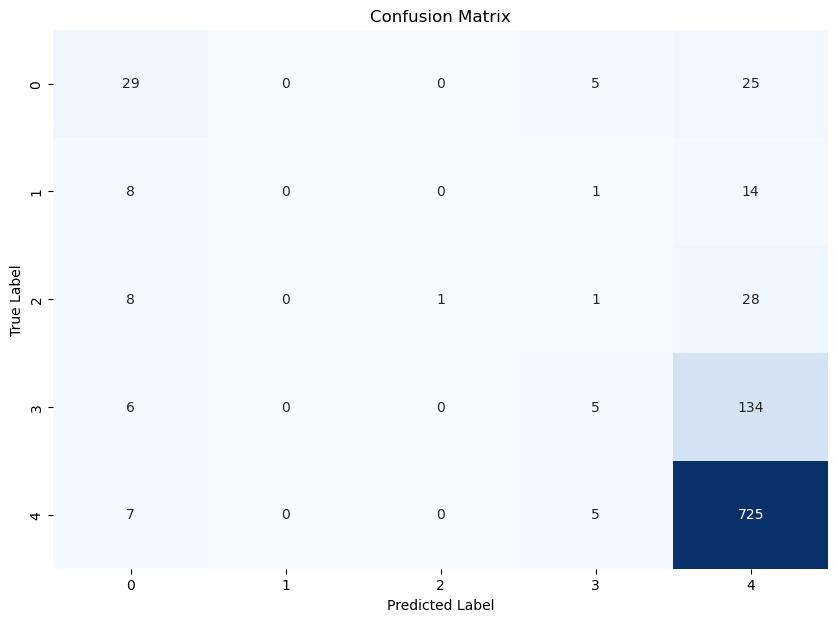

<Figure size 640x480 with 0 Axes>

In [29]:
#Vectorizing dataset using Bag of words

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


# Split the data into training and testing sets
train_data, test_data = train_test_split(df2, test_size=0.2, random_state=42)

# Vectorize the text data using Bag-of-Words
vectorizer = CountVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(train_data['review_text'])
X_test = vectorizer.transform(test_data['review_text'])

# Converting labels to numerical data
y_train = train_data['review_rating']
y_test = test_data['review_rating']

# Train a Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)

# Make predictions on the test set
predictions = naive_bayes_classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')
# Evaluate the model with zero_division parameter
print(classification_report(y_test, predictions, zero_division=1))
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
plt.savefig('confusion_matrix3.png')